In [1]:
import os
%matplotlib inline

import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# new ones
from sklearn import cluster # note the difference
import contextily as cx

/Users/pjbitterman/opt/anaconda3/envs/fixed_hopefully/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/wc/y8x0lwys7d7c8tfp4kpwxy8w0000gn/T/ipykernel_36853/60204541.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS

In [6]:
# let's use my dataset from CA PBE to vaccines research
fpath = "../data/week15inclass/Ks_all.shp" #your path will likely be different
db = gpd.read_file(fpath)
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   s_code1314  6951 non-null   float64 
 1   pb_code131  6951 non-null   object  
 2   pub_priv    6951 non-null   object  
 3   pbe0102     6951 non-null   float64 
 4   pbe0203     6951 non-null   float64 
 5   pbe0304     6951 non-null   float64 
 6   pbe0405     6951 non-null   float64 
 7   pbe0506     6951 non-null   float64 
 8   pbe0607     6951 non-null   float64 
 9   pbe0708     6951 non-null   float64 
 10  pbe0809     6951 non-null   float64 
 11  pbe0910     6951 non-null   float64 
 12  pbe1011     6951 non-null   float64 
 13  pbe1112     6951 non-null   float64 
 14  pbe1213     6658 non-null   object  
 15  pbe1314     6951 non-null   float64 
 16  pbe1415     6951 non-null   float64 
 17  LatLongSou  6951 non-null   object  
 18  Charter     5572 non-null   object  
 19

In [7]:
db.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

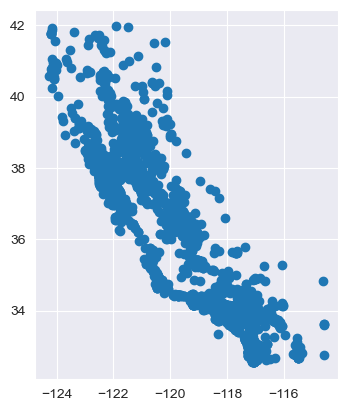

In [8]:
db.plot()

In [9]:
# the enrollment field started as a string (long story), so change back to numeric
db['enroll1314'] = pd.to_numeric(db['enroll1314'])

In [10]:
# verify
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   s_code1314  6951 non-null   float64 
 1   pb_code131  6951 non-null   object  
 2   pub_priv    6951 non-null   object  
 3   pbe0102     6951 non-null   float64 
 4   pbe0203     6951 non-null   float64 
 5   pbe0304     6951 non-null   float64 
 6   pbe0405     6951 non-null   float64 
 7   pbe0506     6951 non-null   float64 
 8   pbe0607     6951 non-null   float64 
 9   pbe0708     6951 non-null   float64 
 10  pbe0809     6951 non-null   float64 
 11  pbe0910     6951 non-null   float64 
 12  pbe1011     6951 non-null   float64 
 13  pbe1112     6951 non-null   float64 
 14  pbe1213     6658 non-null   object  
 15  pbe1314     6951 non-null   float64 
 16  pbe1415     6951 non-null   float64 
 17  LatLongSou  6951 non-null   object  
 18  Charter     5572 non-null   object  
 19

In [11]:
# let's choose some variables related to PBEs
k_props = ['FRL_pct131','pbe1314', 'pctWht1314', 'enroll1314',
           'pctAA1314', 'pme1314']

ERROR 1: PROJ: internal_proj_create_from_database: /Users/pjbitterman/opt/anaconda3/envs/fixed_hopefully/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


CRSError: The WKT could not be parsed. OGR Error code 6

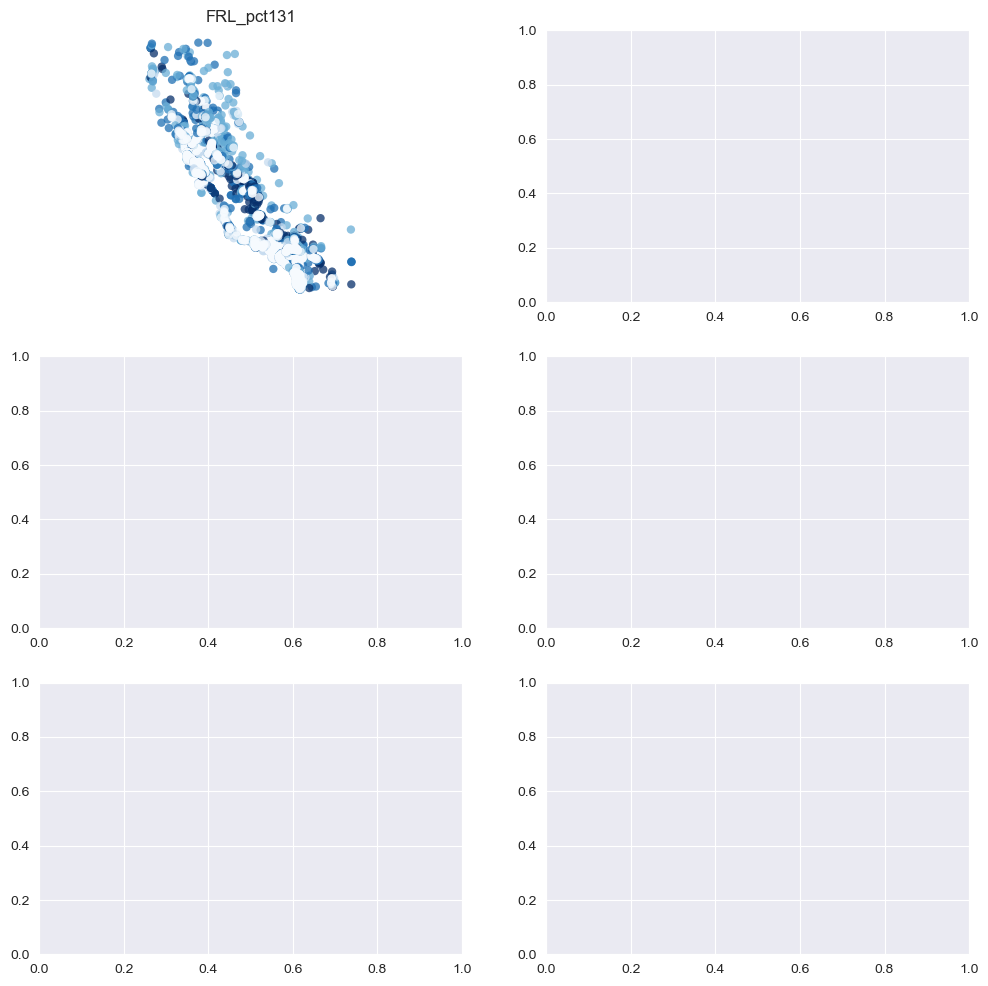

In [12]:
# Create figure and axes (this time it's 6, arranged 3 by 2)
f, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start the loop over all the variables of interest
for i, col in enumerate(k_props):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    db.plot(column=col, ax=ax, scheme='Quantiles', \
             linewidth=0, cmap='Blues', alpha=0.75)
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
    # Add basemap
    cx.add_basemap(ax,
                   crs = db.crs,
                   source=cx.providers.CartoDB.Positron
    )
# Display the figure

plt.show()

/Users/pjbitterman/opt/anaconda3/envs/fixed_hopefully/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


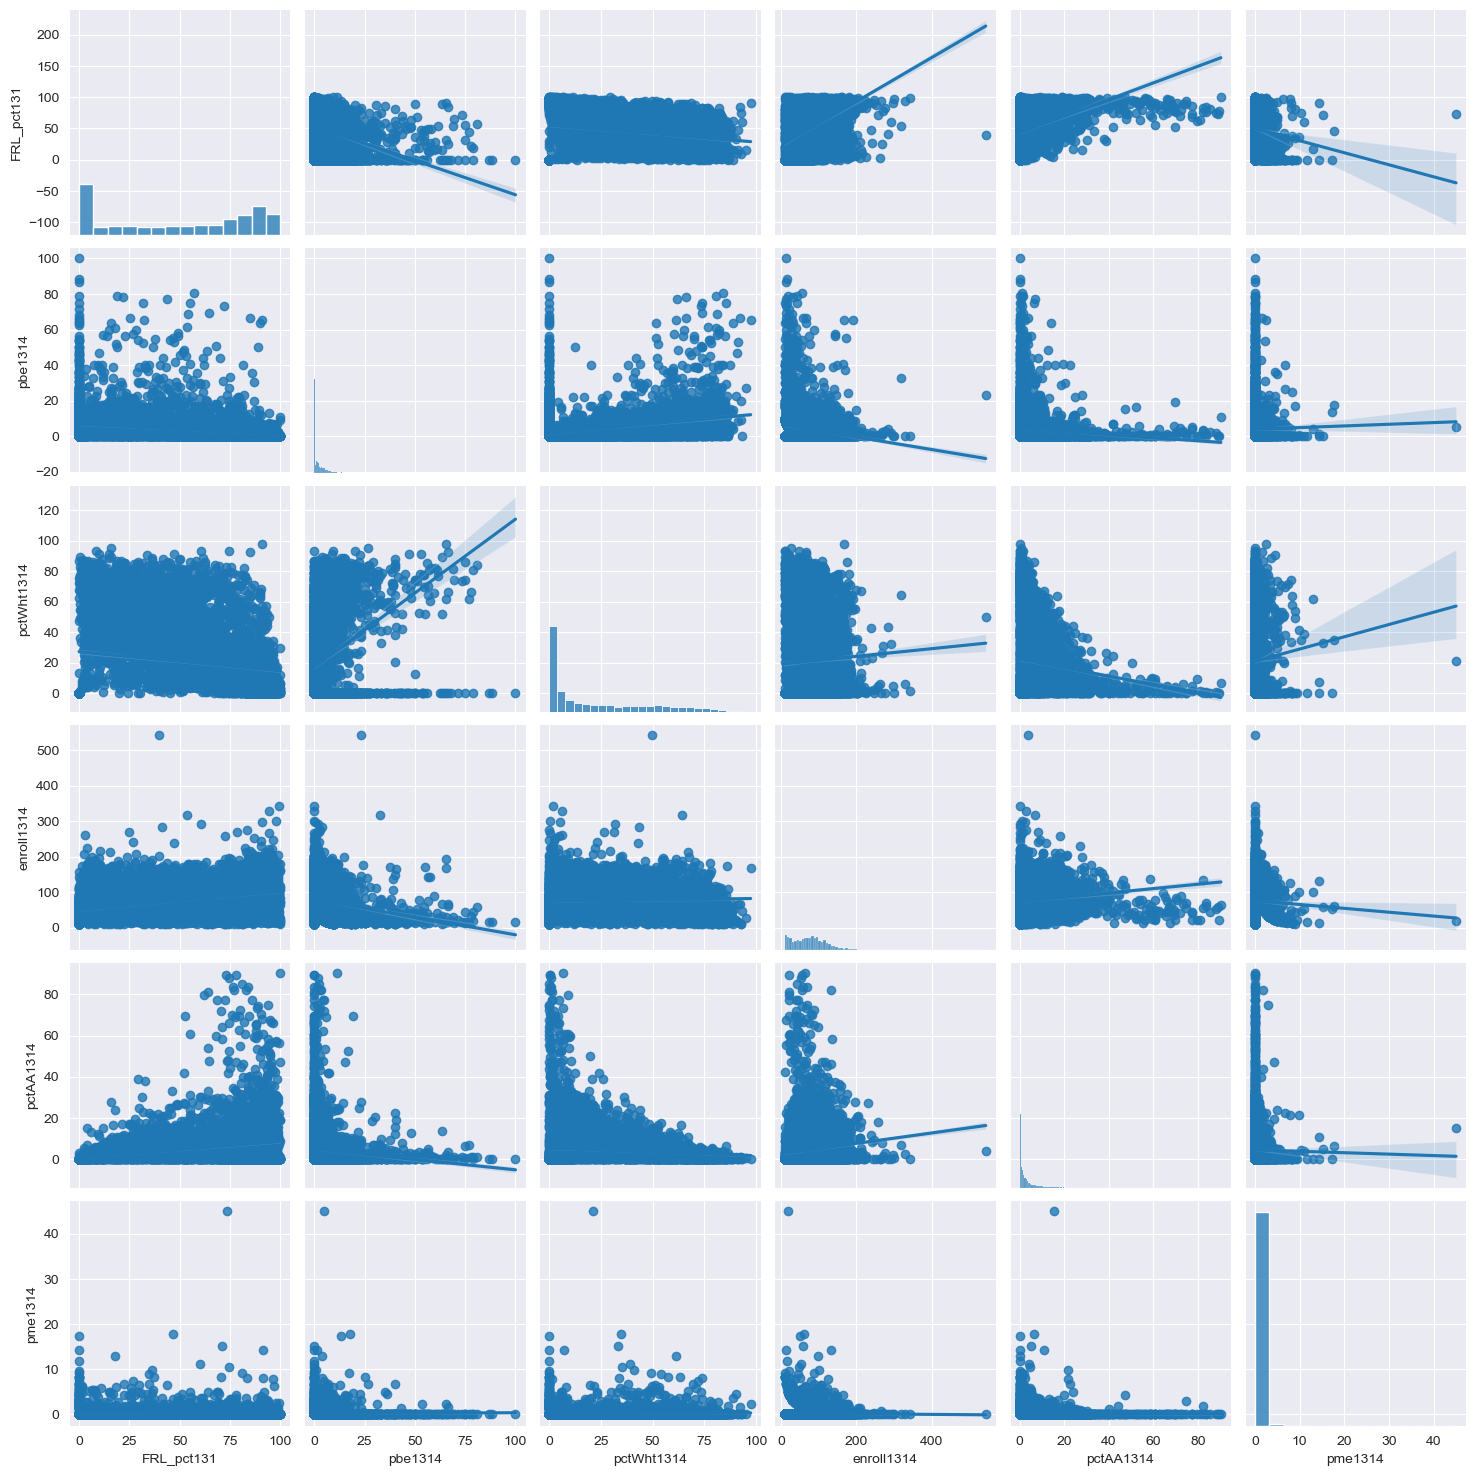

In [13]:
# how do the variables compare???
sns.pairplot(db[k_props], kind='reg', diag_kind='hist')

In [14]:
# setup the kmeans. We'll use k = 5. at this point, we don't even have to pass it the data
# This sets up an object that holds all the parameters required to run the algorithm

kmeans5 = cluster.KMeans(n_clusters=5, random_state=8675309)

In [15]:
# Run the clustering algorithm on the variables we selected
k5cls = kmeans5.fit(db[k_props])

/Users/pjbitterman/opt/anaconda3/envs/fixed_hopefully/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
k5cls
# it's an object

KMeans(n_clusters=5, random_state=8675309)

In [17]:
# look at the labels
k5cls.labels_

array([3, 1, 4, ..., 3, 0, 2], dtype=int32)

In [18]:
# add the cluster labels back to the dataset

db['k5cls'] = k5cls.labels_

ERROR 1: PROJ: internal_proj_create_from_database: /Users/pjbitterman/opt/anaconda3/envs/fixed_hopefully/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


CRSError: The WKT could not be parsed. OGR Error code 6

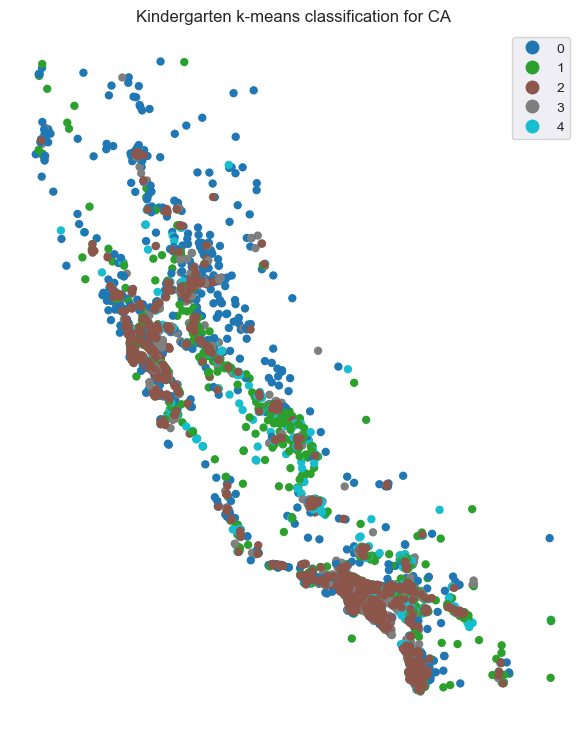

In [19]:
## PLOT THE FIGURE WITH LABELS

# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
db.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
# Remove axis
ax.set_axis_off()
# Add title
plt.title('Kindergarten k-means classification for CA')
cx.add_basemap(ax,
               crs = db.crs,
               source=cx.providers.CartoDB.Positron
)
# Display the map
plt.show()

In [20]:
# Let's look more deeply at the clusters

k5sizes = db.groupby('k5cls').size()
k5sizes

k5cls
0    1040
1    2151
2    1401
3    1167
4    1192
dtype: int64

<Axes: xlabel='k5cls'>

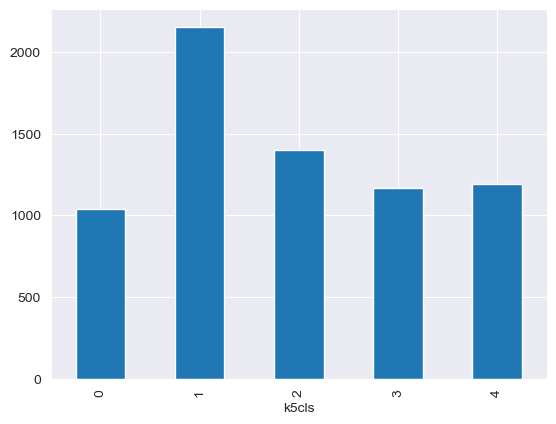

In [21]:
k5sizes.plot.bar()
# cluster 1 is a bit larger than others

In [22]:
# let's look at the means

# Calculate the mean by group
k5means = db.groupby('k5cls')[k_props].mean()
# Transpose it
k5means.T

k5cls,0,1,2,3,4
FRL_pct131,37.926335,80.530112,0.529607,26.225106,83.080485
pbe1314,9.644712,1.378043,5.564618,4.662134,1.127617
pctWht1314,58.420054,10.840208,0.405360,44.057921,8.725188
enroll1314,47.094231,71.050209,28.027837,106.964010,136.872483
pctAA1314,2.659652,8.137211,0.082726,3.476205,6.631356
pme1314,0.249587,0.132552,0.269579,0.255673,0.153834


# QUESTIONS

1. How would you characterize the different clusters?

2. How might the "story" (i.e., the analysis) change...

    3. if you were to use a different subset of variables?
    4. if you were to use a different k?

# TRY IT!